In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [464]:

#Original
#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')
#print(train.shape)
#train.head(10)

#Update
#I had to split the training file because the test file doesn't have any ground-truth labels so we can't find testing accuracy from it
from sklearn.model_selection import train_test_split
file = pd.read_csv('train.csv')
train, test = train_test_split(file, test_size=0.2)


In [465]:
print(train.shape)
train.head()

(712, 12)


PassengerId  Survived  Pclass                               Name   Sex  \
598          599         0       3                  Boulos, Mr. Hanna  male   
728          729         0       2    Bryhl, Mr. Kurt Arnold Gottfrid  male   
413          414         0       2     Cunningham, Mr. Alfred Fleming  male   
631          632         0       3        Lundahl, Mr. Johan Svensson  male   
553          554         1       3  Leeni, Mr. Fahim ("Philip Zenni")  male   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
598   NaN      0      0    2664   7.2250   NaN        C  
728  25.0      1      0  236853  26.0000   NaN        S  
413   NaN      0      0  239853   0.0000   NaN        S  
631  51.0      0      0  347743   7.0542   NaN        S  
553  22.0      0      0    2620   7.2250   NaN        C

In [466]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            139
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          557
Embarked         1
dtype: int64

In [467]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             38
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          130
Embarked         1
dtype: int64

In [468]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

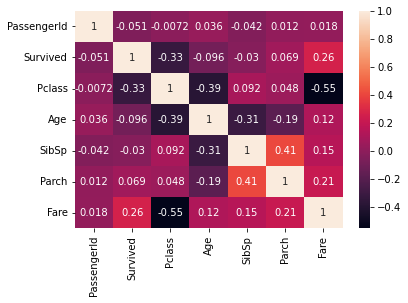

In [469]:
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:>

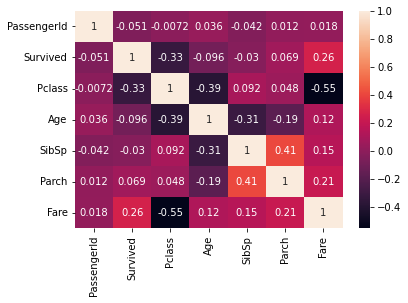

In [470]:
sns.heatmap(train.corr(),annot=True)

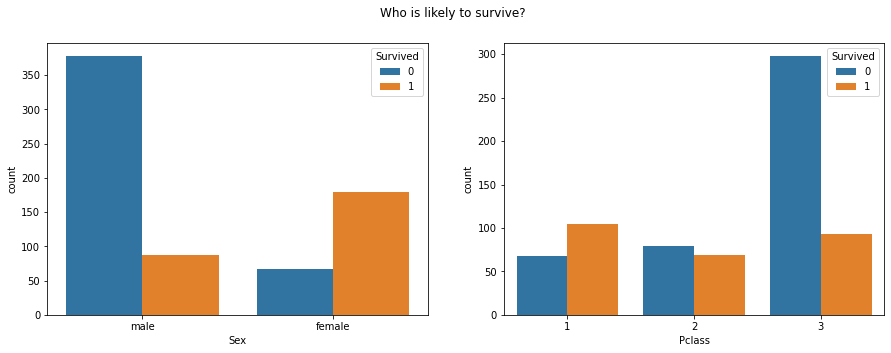

In [471]:
f,ax = plt.subplots(1,2,figsize=(15,5))
f.suptitle('Who is likely to survive?')
sns.countplot(x='Sex',hue='Survived',data=train,ax=ax[0])
sns.countplot(x='Pclass',hue='Survived',data=train,ax=ax[1])
plt.show()

- The first plot shows that the female is more likely to survive than male.
- The second plot shows that individuals in the first class are more likely to survive than other classes.

## Filling in missing values

### Cabin

The deck was determined by the letter in the cabin. We will group the cabins based on the deck they are on. For all the missing values, we will fill in U for unknown.

In [472]:
print('number of unique cabins: '+str(train['Cabin'].nunique())+ ' and number of missing cabins: '+ str(train['Cabin'].isnull().sum()))

number of unique cabins: 125 and number of missing cabins: 557


In [473]:
train['deck'] = train['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')
# we want to get this for the test set for later too
test['deck'] = test['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')


C:\Users\RXRider\AppData\Local\Temp/ipykernel_19344/726162495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['deck'] = train['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')
C:\Users\RXRider\AppData\Local\Temp/ipykernel_19344/726162495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['deck'] = test['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')


Text(0.5, 1.0, 'Survival rates by deck')

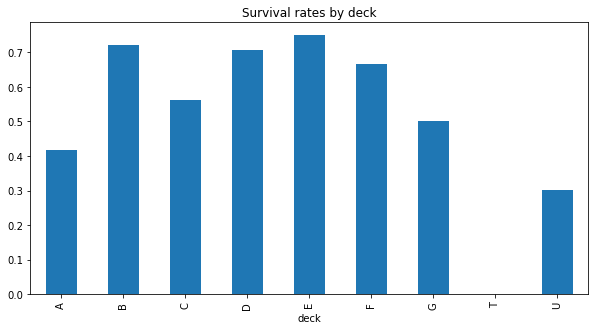

In [474]:
# then let's check our assumptions about the survival by deck
train[['deck', 'Survived']].groupby('deck')['Survived'].mean().plot(kind='bar',figsize=(10,5))
plt.title('Survival rates by deck')


In [475]:
train

PassengerId  Survived  Pclass                               Name     Sex  \
598          599         0       3                  Boulos, Mr. Hanna    male   
728          729         0       2    Bryhl, Mr. Kurt Arnold Gottfrid    male   
413          414         0       2     Cunningham, Mr. Alfred Fleming    male   
631          632         0       3        Lundahl, Mr. Johan Svensson    male   
553          554         1       3  Leeni, Mr. Fahim ("Philip Zenni")    male   
..           ...       ...     ...                                ...     ...   
15            16         1       2   Hewlett, Mrs. (Mary D Kingcome)   female   
848          849         0       2                  Harper, Rev. John    male   
672          673         0       2        Mitchell, Mr. Henry Michael    male   
141          142         1       3           Nysten, Miss. Anna Sofia  female   
587          588         1       1   Frolicher-Stehli, Mr. Maxmillian    male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked deck  
598   NaN      0      0        2664   7.2250   NaN        C    U  
728  25.0      1      0      236853  26.0000   NaN        S    U  
413   NaN      0      0      239853   0.0000   NaN        S    U  
631  51.0      0      0      347743   7.0542   NaN        S    U  
553  22.0      0      0        2620   7.2250   NaN        C    U  
..    ...    ...    ...         ...      ...   ...      ...  ...  
15   55.0      0      0      248706  16.0000   NaN        S    U  
848  28.0      0      1      248727  33.0000   NaN        S    U  
672  70.0      0      0  C.A. 24580  10.5000   NaN        S    U  
141  22.0      0      0      347081   7.7500   NaN        S    U  
587  60.0      1      1       13567  79.2000   B41        C    B  

[712 rows x 13 columns]

### Age

- We are to check how age affects the survival rate.
- Based on the heatmap, there is a correlation between age and Pclass.
- We can also check if age makes a difference based on gender. 


<AxesSubplot:xlabel='Age', ylabel='Density'>

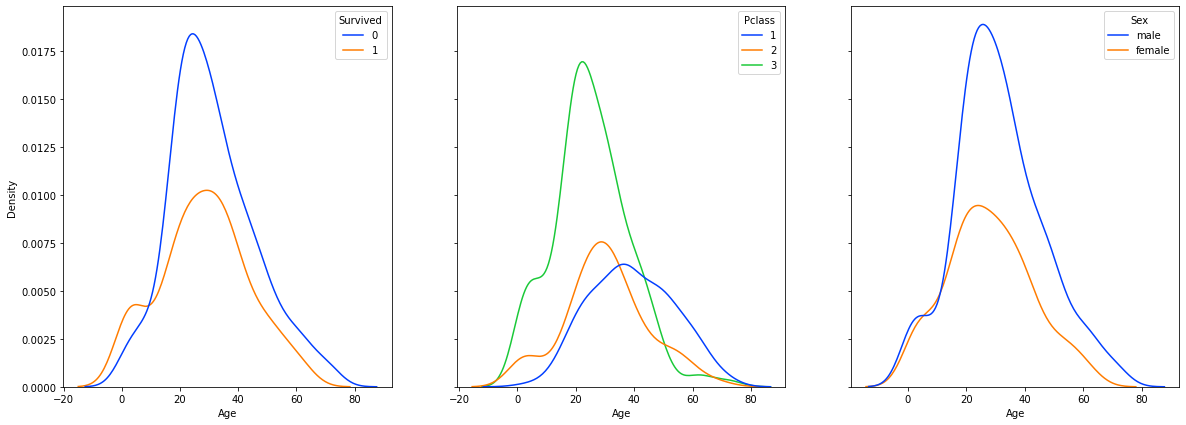

In [476]:
f,ax= plt.subplots(1,3,figsize=(20,7),sharey=True)
sns.kdeplot(x='Age',data=train,hue='Survived',palette='bright',ax=ax[0])
sns.kdeplot(x='Age',data=train,hue='Pclass',palette='bright',ax=ax[1])
sns.kdeplot(x='Age',data=train,hue='Sex',palette='bright' ,ax=ax[2])



- The first plot shows that people between the ages 20 and 40 survived more than the rest.
- The second plot shows that people in the first class are slightly older than the other classes.
- The third plot shows that there are differences in age based on sex. We can say age is correlated to sex.

With this said, we cannot use the overall mean/median to fill in all the missing values. We will take into account the sex and class of each individual, so using the mean/median per category might be better approach.

In [477]:
print('number of missing ages: '+str(train['Age'].isnull().sum()))

number of missing ages: 139


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

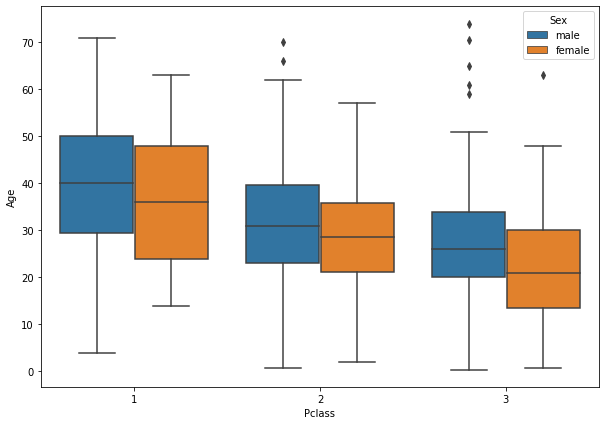

In [478]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=train)

In [479]:
#There is an age difference between the ages of difreent classes and sex within the dataset
train['Age'] = train.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

#get this for the test data too
test['Age'] = test.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))



C:\Users\RXRider\AppData\Local\Temp/ipykernel_19344/3199641837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] = train.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
C:\Users\RXRider\AppData\Local\Temp/ipykernel_19344/3199641837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'] = test.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


### Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

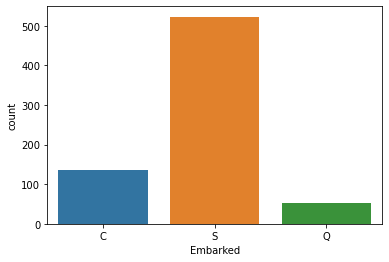

In [480]:
sns.countplot(x='Embarked',data=train)

In [481]:
print('The number of missing values for Embarked port: '+str(train['Embarked'].isnull().sum()))
train[train['Embarked'].isnull()]



The number of missing values for Embarked port: 1


PassengerId  Survived  Pclass                                       Name  \
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked deck  
829  female  62.0      0      0  113572  80.0   B28      NaN    B

The most common port is S (SouthHamptons). So we will use this port to fill in the missing ports.

In [482]:
train['Embarked']=train['Embarked'].fillna(value='S')



C:\Users\RXRider\AppData\Local\Temp/ipykernel_19344/2037302700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Embarked']=train['Embarked'].fillna(value='S')


### Fare

We will fill in the missing fare value based on the class and port embarked.

In [483]:
test[test['Fare'].isnull()]



Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, deck]
Index: []

In [484]:
x = test[(test['Pclass']=='3')& (test['Embarked']=='S')]['Fare'].median()
test['Fare']= test['Fare'].fillna(x)



C:\Users\RXRider\AppData\Local\Temp/ipykernel_19344/4168686641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare']= test['Fare'].fillna(x)


## Feature Engineering

### Name

We can extract the title from the name feature and form categories based on the titles.

In [485]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# do the same for test
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())



C:\Users\RXRider\AppData\Local\Temp/ipykernel_19344/1689182225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
C:\Users\RXRider\AppData\Local\Temp/ipykernel_19344/1689182225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


<AxesSubplot:xlabel='Title', ylabel='count'>

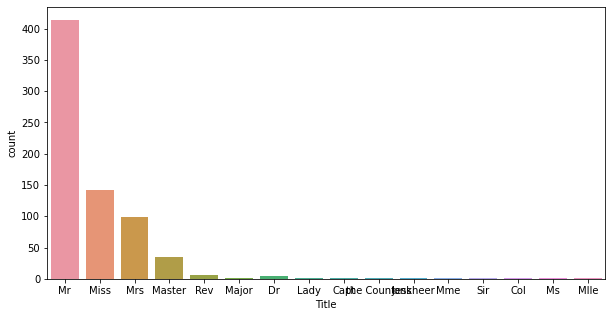

In [486]:
plt.figure(figsize=(10,5))
sns.countplot(x='Title',data=train)



In [487]:
train

PassengerId  Survived  Pclass                               Name     Sex  \
598          599         0       3                  Boulos, Mr. Hanna    male   
728          729         0       2    Bryhl, Mr. Kurt Arnold Gottfrid    male   
413          414         0       2     Cunningham, Mr. Alfred Fleming    male   
631          632         0       3        Lundahl, Mr. Johan Svensson    male   
553          554         1       3  Leeni, Mr. Fahim ("Philip Zenni")    male   
..           ...       ...     ...                                ...     ...   
15            16         1       2   Hewlett, Mrs. (Mary D Kingcome)   female   
848          849         0       2                  Harper, Rev. John    male   
672          673         0       2        Mitchell, Mr. Henry Michael    male   
141          142         1       3           Nysten, Miss. Anna Sofia  female   
587          588         1       1   Frolicher-Stehli, Mr. Maxmillian    male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked deck Title  
598  26.0      0      0        2664   7.2250   NaN        C    U    Mr  
728  25.0      1      0      236853  26.0000   NaN        S    U    Mr  
413  31.0      0      0      239853   0.0000   NaN        S    U    Mr  
631  51.0      0      0      347743   7.0542   NaN        S    U    Mr  
553  22.0      0      0        2620   7.2250   NaN        C    U    Mr  
..    ...    ...    ...         ...      ...   ...      ...  ...   ...  
15   55.0      0      0      248706  16.0000   NaN        S    U   Mrs  
848  28.0      0      1      248727  33.0000   NaN        S    U   Rev  
672  70.0      0      0  C.A. 24580  10.5000   NaN        S    U    Mr  
141  22.0      0      0      347081   7.7500   NaN        S    U  Miss  
587  60.0      1      1       13567  79.2000   B41        C    B    Mr  

[712 rows x 14 columns]

Some titles have few values, so we have grouped them as Other.

In [488]:
train['Title'] = np.where(train['Title'].isin(['Mr', 'Mrs', 'Master', 'Miss']), train['Title'], 'Other')

#do the same for test
test['Title'] = np.where(test['Title'].isin(['Mr', 'Mrs', 'Master', 'Miss']), test['Title'], 'Other')



C:\Users\RXRider\AppData\Local\Temp/ipykernel_19344/146099084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Title'] = np.where(train['Title'].isin(['Mr', 'Mrs', 'Master', 'Miss']), train['Title'], 'Other')
C:\Users\RXRider\AppData\Local\Temp/ipykernel_19344/146099084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Title'] = np.where(test['Title'].isin(['Mr', 'Mrs', 'Master', 'Miss']), test['Title'], 'Other')


In [489]:
train

PassengerId  Survived  Pclass                               Name     Sex  \
598          599         0       3                  Boulos, Mr. Hanna    male   
728          729         0       2    Bryhl, Mr. Kurt Arnold Gottfrid    male   
413          414         0       2     Cunningham, Mr. Alfred Fleming    male   
631          632         0       3        Lundahl, Mr. Johan Svensson    male   
553          554         1       3  Leeni, Mr. Fahim ("Philip Zenni")    male   
..           ...       ...     ...                                ...     ...   
15            16         1       2   Hewlett, Mrs. (Mary D Kingcome)   female   
848          849         0       2                  Harper, Rev. John    male   
672          673         0       2        Mitchell, Mr. Henry Michael    male   
141          142         1       3           Nysten, Miss. Anna Sofia  female   
587          588         1       1   Frolicher-Stehli, Mr. Maxmillian    male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked deck  Title  
598  26.0      0      0        2664   7.2250   NaN        C    U     Mr  
728  25.0      1      0      236853  26.0000   NaN        S    U     Mr  
413  31.0      0      0      239853   0.0000   NaN        S    U     Mr  
631  51.0      0      0      347743   7.0542   NaN        S    U     Mr  
553  22.0      0      0        2620   7.2250   NaN        C    U     Mr  
..    ...    ...    ...         ...      ...   ...      ...  ...    ...  
15   55.0      0      0      248706  16.0000   NaN        S    U    Mrs  
848  28.0      0      1      248727  33.0000   NaN        S    U  Other  
672  70.0      0      0  C.A. 24580  10.5000   NaN        S    U     Mr  
141  22.0      0      0      347081   7.7500   NaN        S    U   Miss  
587  60.0      1      1       13567  79.2000   B41        C    B     Mr  

[712 rows x 14 columns]

<AxesSubplot:xlabel='Title', ylabel='count'>

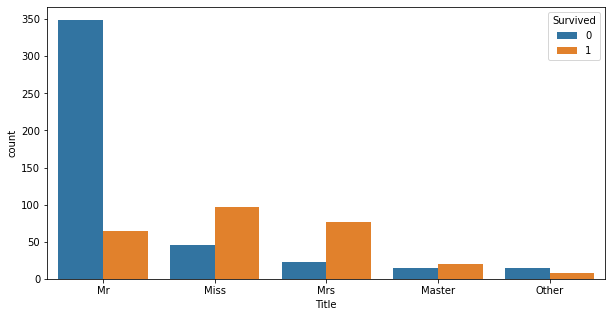

In [490]:
plt.figure(figsize=(10,5))
sns.countplot(x='Title',data=train,hue='Survived')



### Ticket

Some tickects contain letters and numerical values.The plan is to remove all the letters form the string, then group the tickets based on the first leading digit.


In [491]:
#check if there a letters or not
def prefix(ticket):
    
    check = ticket.split(' ')[0][0]
    if check.isalpha():
        return ticket.split(' ')[0]
    else:
        return 'No prefix'

def ticket_features(df):
    
    df['Ticket'] = df['Ticket'].replace('LINE','LINE 0')
    df['Ticket'] = df['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
    df['Prefix'] = df['Ticket'].apply(lambda x: prefix(x))
    df['TNumeric'] = df['Ticket'].apply(lambda x: int(x.split(' ')[-1]))
    df['TNlen'] = df['TNumeric'].apply(lambda x : len(str(x)))
    df['Ticket_LeadingDigit'] = df['TNumeric'].apply(lambda x : int(str(x)[0]))
    df['TGroup'] = df['TNumeric'].apply(lambda x: str(x//10))

    df = df.drop(columns=['Ticket','TNumeric','Prefix','TNlen','TGroup'])

    return df

train = ticket_features(train)
test = ticket_features(test)
train.head(1)



C:\Users\RXRider\AppData\Local\Temp/ipykernel_19344/1879425324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ticket'] = df['Ticket'].replace('LINE','LINE 0')
C:\Users\RXRider\AppData\Local\Temp/ipykernel_19344/1879425324.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ticket'] = df['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
C:\Users\RXRider\AppData\Local\Temp/ipykernel_19344/1879425324.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

PassengerId  Survived  Pclass               Name   Sex   Age  SibSp  \
598          599         0       3  Boulos, Mr. Hanna  male  26.0      0   

     Parch   Fare Cabin Embarked deck Title  Ticket_LeadingDigit  
598      0  7.225   NaN        C    U    Mr                    2

In [492]:
train['deck'].unique()



array(['U', 'C', 'B', 'A', 'E', 'F', 'D', 'T', 'G'], dtype=object)

### Encoding Categorical features

In [493]:
# encoding sex column
train.replace({'Sex':{'male':0,'female':1}}, inplace=True)
test.replace({'Sex':{'male':0,'female':1}}, inplace=True)

 # encoding 'embarked' column
train.replace({'Embarked':{'C':0,'S':1, 'Q':2}}, inplace=True)
test.replace({'Embarked':{'C':0,'S':1, 'Q':2}}, inplace=True)

#encoding title column
train.replace({'Title':{'Mr':0,'Mrs':1, 'Master':2, 'Miss':3, 'Other':5}}, inplace=True)
test.replace({'Title':{'Mr':0,'Mrs':1, 'Master':2, 'Miss':3, 'Other':5}}, inplace=True)

deck = pd.get_dummies(train['deck'],prefix='Cabin')
train = train.drop(columns= ['Cabin', 'Name', 'deck'], axis=1)
train= pd.concat([train,deck],axis=1)

deck1 = pd.get_dummies(test['deck'],prefix='Cabin')
test = test.drop(columns= ['Cabin', 'Name' , 'deck'], axis=1)
test= pd.concat([test,deck1],axis=1)


In [494]:
y_train = train['Survived']
x_train = train.drop(['Survived', 'PassengerId'], axis=1)

In [495]:
# sex = pd.get_dummies(train['Sex'])
# embarked = pd.get_dummies(train['Embarked'])
# deck = pd.get_dummies(train['deck'],prefix='Cabin')
# title=pd.get_dummies(train['Title'])
# train= pd.concat([train,sex,title,deck,embarked],axis=1)

# #do for test
# sex1 = pd.get_dummies(test['Sex'])
# embarked1 = pd.get_dummies(test['Embarked'])
# deck1 = pd.get_dummies(test['deck'],prefix='Cabin')
# title1 = pd.get_dummies(test['Title'])
# test= pd.concat([test,sex1,title1,deck1,embarked1],axis=1)
# pd.set_option('display.max_columns',None)
# test.head(1)

In [496]:
train.dtypes

PassengerId              int64
Survived                 int64
Pclass                   int64
Sex                      int64
Age                    float64
SibSp                    int64
Parch                    int64
Fare                   float64
Embarked                 int64
Title                    int64
Ticket_LeadingDigit      int64
Cabin_A                  uint8
Cabin_B                  uint8
Cabin_C                  uint8
Cabin_D                  uint8
Cabin_E                  uint8
Cabin_F                  uint8
Cabin_G                  uint8
Cabin_T                  uint8
Cabin_U                  uint8
dtype: object

In [497]:
x_train

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title  \
598       3    0  26.0      0      0   7.2250         0      0   
728       2    0  25.0      1      0  26.0000         1      0   
413       2    0  31.0      0      0   0.0000         1      0   
631       3    0  51.0      0      0   7.0542         1      0   
553       3    0  22.0      0      0   7.2250         0      0   
..      ...  ...   ...    ...    ...      ...       ...    ...   
15        2    1  55.0      0      0  16.0000         1      1   
848       2    0  28.0      0      1  33.0000         1      5   
672       2    0  70.0      0      0  10.5000         1      0   
141       3    1  22.0      0      0   7.7500         1      3   
587       1    0  60.0      1      1  79.2000         0      0   

     Ticket_LeadingDigit  Cabin_A  Cabin_B  Cabin_C  Cabin_D  Cabin_E  \
598                    2        0        0        0        0        0   
728                    2        0        0        0        0        0   
413                    2        0        0        0        0        0   
631                    3        0        0        0        0        0   
553                    2        0        0        0        0        0   
..                   ...      ...      ...      ...      ...      ...   
15                     2        0        0        0        0        0   
848                    2        0        0        0        0        0   
672                    2        0        0        0        0        0   
141                    3        0        0        0        0        0   
587                    1        0        1        0        0        0   

     Cabin_F  Cabin_G  Cabin_T  Cabin_U  
598        0        0        0        1  
728        0        0        0        1  
413        0        0        0        1  
631        0        0        0        1  
553        0        0        0        1  
..       ...      ...      ...      ...  
15         0        0        0        1  
848        0        0        0        1  
672        0        0        0        1  
141        0        0        0        1  
587        0        0        0        0  

[712 rows x 18 columns]

Convert Dataframe to Matrix

In [498]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_train = np.insert(x_train, 0, 1, axis=1) #insert a first column of 1's as x0 
print(x_train)

[[1. 3. 0. ... 0. 0. 1.]
 [1. 2. 0. ... 0. 0. 1.]
 [1. 2. 0. ... 0. 0. 1.]
 ...
 [1. 2. 0. ... 0. 0. 1.]
 [1. 3. 1. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 0.]]


Initialise B: set of training parameters

In [499]:
B = np.random.normal(size = x_train.shape[1]) #x_train.shape[1] = number of features including x0
print(B)

[-1.65103504e+00 -2.84074992e-01  1.34754084e+00  4.49215607e-01
  8.49131820e-01 -1.30394006e+00 -6.79338549e-01  6.44133907e-01
 -2.01230329e+00 -1.86730659e+00 -3.98076437e-02  6.65954519e-01
 -3.60704278e-01  1.84626776e+00  5.94013133e-01 -6.06946071e-04
  4.28253765e-01 -2.12062899e-01  2.24874522e+00]


Sigmoid function

In [500]:
def sigmoid(x):
    if x > 700:      #avoid math overflow error
        sig = 1.0

    elif x <= -700: #avoid math overflow error
        sig = 0

    else:
        sig = 1 / (1 + math.exp(-x))
        
    return sig

get H_x from function below

In [501]:
def g_z(X, B):
    Y = []
    for i in range(X.shape[0]):
        z = np.dot(X[i], B) #multiply B times X
        Y.append(sigmoid(z))
    
    return np.asarray(Y) #convert list to array

Error Function

In [502]:
def J_B(true_y, pred_y, B, regPara):
    epsilon = 1e-5 # to prevent 0 values in log

    a  = (true_y * np.log(pred_y + epsilon)) + ((1-true_y) * np.log((1 - pred_y) +epsilon))
    b = regPara * (np.sum(np.square(B[1:]))) 
    return (-1 * np.sum(a)) + b

Get Prediction Function

In [503]:
def getPredictions(H_x):
    Y = []
    for i in range(H_x.size):
        if(H_x[i] >= 0.5):
            Y.append(1)
        else:
            Y.append(0)
    return np.asarray(Y)

Get Accuracy function

In [504]:
def getAccuracy(y_true, y_pred):
    sum = 0
    for i in range(y_true.size):
        if y_true[i] == y_pred[i]:
            sum = sum + 1
            
    return np.round(sum/y_true.size,4)

Gradient Descent with regularization Function

In [505]:
 #Y(actual values),X(features), B(training parameters), reg_para(regularisation parameter), l_rate(learning rate), epsilon(stop GD when norm < epsilon)
def Grad_Desc(Y, X, B, reg_para, l_rate, epsilon):
    norm = epsilon + 1
    H_x = g_z(X, B)
    B_old = B.copy()
    while norm > epsilon:
        for i in range(B.size):
            if i == 0: # no regularization
                B[i] = B[i] - (l_rate * np.sum(H_x - Y))
            else:
                B[i] = B[i] - (l_rate * (np.sum((H_x - Y) * X[:,i]) - (reg_para * B[i] / X.shape[0])))
        norm = np.linalg.norm(np.subtract(B,B_old), 2)
        H_x = g_z(X, B)
        B_old = B.copy()
        
    return B

In [506]:
print("Original Parameters")
print(B)

h_x = g_z(x_train, B)
print("Original Error: " + str(J_B(y_train, h_x, B, regPara=0.5)) )

print("Accuracy: " + str(getAccuracy(y_train, getPredictions(h_x)) * 100) + "%")

Original Parameters
[-1.65103504e+00 -2.84074992e-01  1.34754084e+00  4.49215607e-01
  8.49131820e-01 -1.30394006e+00 -6.79338549e-01  6.44133907e-01
 -2.01230329e+00 -1.86730659e+00 -3.98076437e-02  6.65954519e-01
 -3.60704278e-01  1.84626776e+00  5.94013133e-01 -6.06946071e-04
  4.28253765e-01 -2.12062899e-01  2.24874522e+00]
Original Error: 3013.712964966111
Accuracy: 41.15%


Perform Gradient Descent

In [507]:
#Testing Data
y_test = test['Survived']
x_test = test.drop(['Survived', 'PassengerId'], axis=1)

y_test = y_test.to_numpy()
x_test = x_test.to_numpy()


x_test = np.insert(x_test, 0, 1, axis=1) #insert a first column of 1's as x0 
print(x_test)

[[1. 3. 0. ... 0. 0. 1.]
 [1. 3. 0. ... 0. 0. 1.]
 [1. 3. 1. ... 0. 0. 1.]
 ...
 [1. 3. 1. ... 0. 0. 1.]
 [1. 3. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 0.]]


In [508]:
print(np.shape(x_test))
print(np.shape(x_train))
print(x_train[0])
print(x_test[0])

(179, 17)
(712, 19)
[ 1.     3.     0.    26.     0.     0.     7.225  0.     0.     2.
  0.     0.     0.     0.     0.     0.     0.     0.     1.   ]
[ 1.      3.      0.     20.      0.      0.      9.8458  1.      0.
  7.      0.      0.      0.      0.      0.      0.      1.    ]


In [509]:
import time

def Logistic_Regression(new_reg_para,new_l_rate,new_epsilon):
    start_time = time.time()
    B_new = Grad_Desc(y_train, x_train, B.copy(), reg_para=new_reg_para, l_rate=new_l_rate, epsilon=new_epsilon)
    #print("New Parameters")
    #print(B_new)

    h_x_new = g_z(x_train, B_new)
    print("Error after Gradient Descent: " + str(J_B(y_train, h_x_new, B_new, regPara=new_reg_para)) )
    end_time = time.time()
    
    y_pred = getPredictions(h_x_new)
    training_accuracy = getAccuracy(y_train, y_pred)
    #print(f"Learning Rate: {new_l_rate}")
    print(f"Time taken to train model: {end_time-start_time}s")
    print("Training Accuracy: " + str(training_accuracy*100) + " %")
    
    #Testing Data shape not the same as Training Data
    #Testing Accuracy
    #h_x_testing = g_z(x_test,B_new)
    #y_pred_test = getPredictions(h_x_testing)
    #testing_accuracy = getAccuracy(y_test, y_pred_test)
    #print("Testing Accuracy: " + str(testing_accuracy*100) + " %\n\n")
    testing_accuracy = training_accuracy # Delete this when testing data is fixed
    
    return training_accuracy, testing_accuracy

In [510]:
#Logistic Regression with Regression
training_accuracy, testing_accuracy = Logistic_Regression(0.5,0.000005,0.00005)

Error after Gradient Descent: 322.51584605015194
Time taken to train model: 33.2107880115509s
Training Accuracy: 80.34 %


In [511]:
#Investigate Effect of Different Learning Rates

#Pick 10 learning rates
learning_rates = [0.0000005 * i for i in range(10)]

#Lists to store training and testing accuracies for each learning rate
training_accuracy_list = []
testing_accuracy_list = [] 

#For each learning rate
for i in range(0,len(learning_rates)):
    print(f"Learning Rate: {learning_rates[i]}")
    training_accuracy, testing_accuracy = Logistic_Regression(0.5, learning_rates[i],0.00005)
    training_accuracy_list.append(training_accuracy)
    testing_accuracy_list.append(testing_accuracy)


Learning Rate: 0.0
Error after Gradient Descent: 3013.712964966111
Time taken to train model: 0.003971099853515625s
Training Accuracy: 41.15 %
Learning Rate: 5e-07
Error after Gradient Descent: 419.91693450603333
Time taken to train model: 26.024266004562378s
Training Accuracy: 75.7 %
Learning Rate: 1e-06
Error after Gradient Descent: 366.97623239301157
Time taken to train model: 25.990980625152588s
Training Accuracy: 77.66999999999999 %
Learning Rate: 1.5e-06
Error after Gradient Descent: 348.9978726034371
Time taken to train model: 25.761330366134644s
Training Accuracy: 79.63 %
Learning Rate: 2e-06
Error after Gradient Descent: 341.65970052658207
Time taken to train model: 24.034008979797363s
Training Accuracy: 79.78 %
Learning Rate: 2.4999999999999998e-06
Error after Gradient Descent: 337.26178942486325
Time taken to train model: 23.6776065826416s
Training Accuracy: 79.92 %
Learning Rate: 3e-06
Error after Gradient Descent: 333.75246451041136
Time taken to train model: 24.4340324401

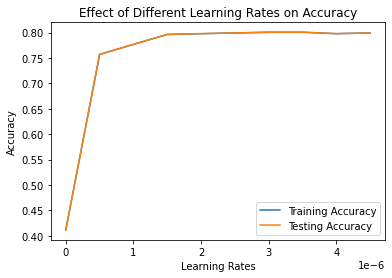

In [512]:
#Plot Training Accuracy
plt.plot(learning_rates, training_accuracy_list, label="Training Accuracy")

#Plot Testing Accuracy
plt.plot(learning_rates, testing_accuracy_list, label="Testing Accuracy")
    
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy')

plt.legend()

plt.title('Effect of Different Learning Rates on Accuracy')
plt.show()

In [513]:
#Investigate Effect of Different Regularisation Parameters

#Pick 5 regularisation parameters
reg_params = [0.1 * i for i in range(5)]
print(reg_params)

#Lists to store training and testing accuracies for each learning rate
training_accuracy_list = []
testing_accuracy_list = [] 

#For each Regularisation Parameter
for i in range(0,len(reg_params)):
    print(f"Regularisation Parameter: {reg_params[i]}")
    training_accuracy, testing_accuracy = Logistic_Regression(reg_params[i], 0.000005,0.00005)
    training_accuracy_list.append(training_accuracy)
    testing_accuracy_list.append(testing_accuracy)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4]
Regularisation Parameter: 0.0
Error after Gradient Descent: 315.3594085037367
Time taken to train model: 31.34747004508972s
Training Accuracy: 80.34 %
Regularisation Parameter: 0.1
Error after Gradient Descent: 316.79074123238007
Time taken to train model: 31.944989681243896s
Training Accuracy: 80.34 %
Regularisation Parameter: 0.2
Error after Gradient Descent: 318.2216564508593
Time taken to train model: 31.24859595298767s
Training Accuracy: 80.34 %
Regularisation Parameter: 0.30000000000000004
Error after Gradient Descent: 319.6531388604031
Time taken to train model: 31.330941438674927s
Training Accuracy: 80.34 %
Regularisation Parameter: 0.4
Error after Gradient Descent: 321.0846935835571
Time taken to train model: 31.239667654037476s
Training Accuracy: 80.34 %


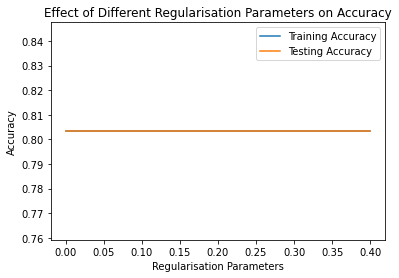

In [514]:
#Plot Training Accuracy
plt.plot(reg_params, training_accuracy_list, label="Training Accuracy")

#Plot Testing Accuracy
plt.plot(reg_params, testing_accuracy_list, label="Testing Accuracy")
    
plt.xlabel('Regularisation Parameters')
plt.ylabel('Accuracy')

plt.legend()

plt.title('Effect of Different Regularisation Parameters on Accuracy')
plt.show()

In [515]:
#Investigate Effect of Different Epsilon Parameters

#Pick 5 epsilon parameters
epsilon_params = [0.00001 * i for i in range(5)]
print(epsilon_params)

#Lists to store training and testing accuracies for each learning rate
training_accuracy_list = []
testing_accuracy_list = [] 

#For each Regularisation Parameter
for i in range(0,len(epsilon_params)):
    print(f"Epsilon Parameter: {epsilon_params[i]}")
    training_accuracy, testing_accuracy = Logistic_Regression(epsilon_params[i], 0.000005,0.00005)
    training_accuracy_list.append(training_accuracy)
    testing_accuracy_list.append(testing_accuracy)

[0.0, 1e-05, 2e-05, 3.0000000000000004e-05, 4e-05]
Epsilon Parameter: 0.0
Error after Gradient Descent: 315.3594085037367
Time taken to train model: 31.334413051605225s
Training Accuracy: 80.34 %
Epsilon Parameter: 1e-05
Error after Gradient Descent: 315.3595516333949
Time taken to train model: 29.885121822357178s
Training Accuracy: 80.34 %
Epsilon Parameter: 2e-05
Error after Gradient Descent: 315.3596947630537
Time taken to train model: 29.851859092712402s
Training Accuracy: 80.34 %
Epsilon Parameter: 3.0000000000000004e-05
Error after Gradient Descent: 315.3598378927133
Time taken to train model: 29.86673927307129s
Training Accuracy: 80.34 %
Epsilon Parameter: 4e-05
Error after Gradient Descent: 315.3599810223736
Time taken to train model: 29.78440499305725s
Training Accuracy: 80.34 %


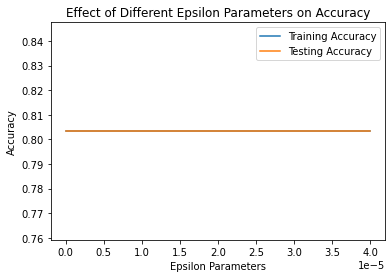

In [516]:
#Plot Training Accuracy
plt.plot(epsilon_params, training_accuracy_list, label="Training Accuracy")

#Plot Testing Accuracy
plt.plot(epsilon_params, testing_accuracy_list, label="Testing Accuracy")
    
plt.xlabel('Epsilon Parameters')
plt.ylabel('Accuracy')

plt.legend()

plt.title('Effect of Different Epsilon Parameters on Accuracy')
plt.show()

In [517]:
#Logistic_Regression(0.5,0.0000005,0.00005)